### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random

### Create Dataset

In [6]:
data = []
date_range = pd.date_range("01/07/2020", "01/21/2020")

for i in range(len(date_range)):
    sales_cash = random.randint(1, 20)
    sales_card = random.randint(1, 20)
    
    day_type = "Weekday"
    
    if date_range[i].weekday() > 4:
        day_type = "Weekand"
    
    data.append([str(date_range[i].date()), day_type, "Cash", sales_cash])
    data.append([str(date_range[i].date()), day_type, "Card", sales_card])
    
data = pd.DataFrame(data, columns=["Date", "Day_Type", "Payment_Type", "Sales"])

In [8]:
df = data.copy()

In [14]:
df.head()

,Date,Day_Type,Payment_Type,Sales
0,2020-01-07,Weekday,Cash,3
1,2020-01-07,Weekday,Card,12
2,2020-01-08,Weekday,Cash,19
3,2020-01-08,Weekday,Card,10
4,2020-01-09,Weekday,Cash,11


In [10]:
type(df.rolling(window=4))

pandas.core.window.rolling.Rolling

### Rolling Functions

#### 1- Rolling Sum

In [11]:
data["rolling_sum_2"] = df.rolling(window=2)["Sales"].sum()
# With window=2, we intend to sum the “Sales” column over 2 contiguous records.

In [13]:
data.head()

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2
0,2020-01-07,Weekday,Cash,3,NaN
1,2020-01-07,Weekday,Card,12,15.0
2,2020-01-08,Weekday,Cash,19,31.0
3,2020-01-08,Weekday,Card,10,29.0
4,2020-01-09,Weekday,Cash,11,21.0


In [15]:
data["rolling_sum_2"] = df.rolling(window=2, min_periods=1)["Sales"].sum()
# The min_periods argument specifies the minimum number of observations in the current window required to generate a rolling value;
# otherwise, the result is NaN.

In [16]:
data.head()

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2
0,2020-01-07,Weekday,Cash,3,3.0
1,2020-01-07,Weekday,Card,12,15.0
2,2020-01-08,Weekday,Cash,19,31.0
3,2020-01-08,Weekday,Card,10,29.0
4,2020-01-09,Weekday,Cash,11,21.0


#### 2- Rolling Sum Over Days

In [19]:
df["Date"] = pd.to_datetime(df["Date"])
df["rolling_sum_2days"] = df.rolling(window="2d", on="Date")["Sales"].sum()
# The argument window=’2d’ is interpreted as “2 days” by the rolling class.

In [20]:
df.head()

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2days
0,2020-01-07,Weekday,Cash,3,3.0
1,2020-01-07,Weekday,Card,12,15.0
2,2020-01-08,Weekday,Cash,19,34.0
3,2020-01-08,Weekday,Card,10,44.0
4,2020-01-09,Weekday,Cash,11,40.0


In [21]:
df.groupby("Date").last()

,Day_Type,Payment_Type,Sales,rolling_sum_2days
Date,,,,
2020-01-07,Weekday,Card,12,15.0
2020-01-08,Weekday,Card,10,44.0
2020-01-09,Weekday,Card,3,43.0
2020-01-10,Weekday,Card,17,39.0
2020-01-11,Weekand,Card,2,30.0
2020-01-12,Weekand,Card,20,30.0
2020-01-13,Weekday,Card,10,48.0
2020-01-14,Weekday,Card,9,35.0
2020-01-15,Weekday,Card,17,31.0


####  3- Grouped Rolling

In [32]:
df["rolling_sum_grouped"] = df.groupby("Payment_Type").rolling(window=2)["Sales"].\
                            sum().reset_index().set_index("level_1").sort_index()["Sales"]

In [34]:
df.head(10)

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2days,rolling_sum_grouped
0,2020-01-07,Weekday,Cash,3,3.0,NaN
1,2020-01-07,Weekday,Card,12,15.0,NaN
2,2020-01-08,Weekday,Cash,19,34.0,22.0
3,2020-01-08,Weekday,Card,10,44.0,22.0
4,2020-01-09,Weekday,Cash,11,40.0,30.0
5,2020-01-09,Weekday,Card,3,43.0,13.0
6,2020-01-10,Weekday,Cash,8,22.0,19.0
7,2020-01-10,Weekday,Card,17,39.0,20.0
8,2020-01-11,Weekand,Cash,3,28.0,11.0
9,2020-01-11,Weekand,Card,2,30.0,19.0


#### 4- Rolling Mean

In [36]:
df["rolling_avg_3days"] = df.rolling(window=6, min_periods=1)["Sales"].mean()

In [37]:
df.head(10)

,Date,Day_Type,Payment_Type,Sales,rolling_sum_2days,rolling_sum_grouped,rolling_avg_3days
0,2020-01-07,Weekday,Cash,3,3.0,NaN,3.000000
1,2020-01-07,Weekday,Card,12,15.0,NaN,7.500000
2,2020-01-08,Weekday,Cash,19,34.0,22.0,11.333333
3,2020-01-08,Weekday,Card,10,44.0,22.0,11.000000
4,2020-01-09,Weekday,Cash,11,40.0,30.0,11.000000
5,2020-01-09,Weekday,Card,3,43.0,13.0,9.666667
6,2020-01-10,Weekday,Cash,8,22.0,19.0,10.500000
7,2020-01-10,Weekday,Card,17,39.0,20.0,11.333333
8,2020-01-11,Weekand,Cash,3,28.0,11.0,8.666667
9,2020-01-11,Weekand,Card,2,30.0,19.0,7.333333


#### Extra- Plot The Moving Average 

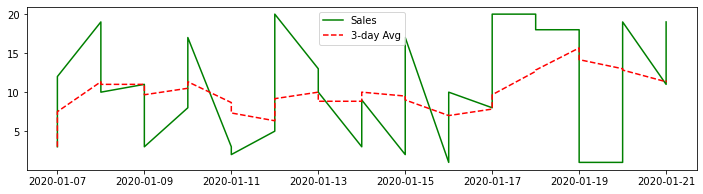

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))

plt.plot(df["Date"], df["Sales"], label="Sales", color="green")
plt.plot(df["Date"], df["rolling_avg_3days"], color="red", label="3-day Avg", linestyle="--")

plt.legend()
plt.show()